<a href="https://colab.research.google.com/github/anushkagupta1307/IR2022_Project_27/blob/main/Project_Till_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

In [ ]:
#function for scraping all the reviews for the provided URL

def scraping_amazon_reviews(url):

  flag=0;
  count=0;
  u=1;

  link=url
  page = requests.get(link)
  #getting content of the provided URL with HTML parser
  soup = bs(page.content,'html.parser')

  #gettting total number of ratings from the webpage, to know from how many pages we have to fetch data 
  total_ratings = soup.find_all("",{"data-hook":"cr-filter-info-review-rating-count"})
  #print(total_ratings)
  total_ratings_lstrips=total_ratings[0].get_text().lstrip('\n')
  total_ratings_rstrips=total_ratings_lstrips.rstrip('\n')
  total_ratings_rstrips = total_ratings_rstrips.replace(",", "")
  result = total_ratings_rstrips.index('total ratings')

  #print(result)

  position=0
  for i in range(result-2,0,-1):
      if total_ratings_rstrips[i]==' ':
        position=i
        break;

  #print(position)

  #extracted total number of reviews
  total_ratings_final=int(total_ratings_rstrips[position+1:result-1])
  #print(total_ratings_final)
  
  #creating empty dataframe with the mentioned columns
  df = pd.DataFrame(columns = ['Customer Name', 'Review title', 'Ratings','Reviews'])
  # u<=(total_ratings_final/10)
  while(u<=(200)):

    #populating dataframe page by page as each page contains only 10 reviews
    url=url+"&pageNumber="+str(u)
    page = requests.get(url)

    if page.status_code!=200:
      #print("breaked at",u)
      flag=1
      continue;
    
    soup = bs(page.content,'html.parser')

    #getting name of the reviewer using class id - a-profile-name 
    names = soup.find_all('span',class_='a-profile-name')
    cust_name = []
    for i in range(0,len(names)):
        cust_name.append(names[i].get_text())

    #popping first two names because they are for the top positve and top critical
    cust_name.pop(0)
    cust_name.pop(0)

    #collecting indexes for the repeating customer names
    indexes_to_remove=[]
    for i in range(len(cust_name)):
      
      for j in range(i+1,len(cust_name)):
        if cust_name[i]==cust_name[j]:
          #print(cust_name[i])
          indexes_to_remove.append(j)

    #storing unique entries to the list
    for i in range(len(indexes_to_remove)-1,-1,-1):
        cust_name.pop(indexes_to_remove[i])

    #fetching title of the review using the class id - review-title-content 
    title = soup.find_all('a',class_='review-title-content')
    review_title = []
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())
    
    #stripping extra spaces from left and right from the title
    review_title[:] = [titles.lstrip('\n') for titles in review_title]
    review_title[:] = [titles.rstrip('\n') for titles in review_title]

    #fetching rating of the review using the class id - review-rating
    rating = soup.find_all('i',class_='review-rating')
    rate = []
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    #popping first two ratings because they are for the top positve and top critical
    rate.pop(0)
    rate.pop(0)

    #fetching review of the review using the class id - review-body
    review = soup.find_all("span",{"data-hook":"review-body"})

    review_content = []
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())

    #stripping extra spaces from left and right from the review
    review_content[:] = [reviews.lstrip('\n') for reviews in review_content]
    review_content[:] = [reviews.rstrip('\n') for reviews in review_content]
    #print(review_content)


    #finally storing each of the value to the created dataframe earlier
    for i in range(len(cust_name)):
      
      df=df.append({'Customer Name':cust_name[i], 'Review title':review_title[i], 'Ratings':rate[i],'Reviews':review_content[i]},ignore_index=True)

    u=u+1
    count=count+1

  #print(df)
  return df;


In [ ]:
df_amazon=scraping_amazon_reviews("https://www.amazon.in/OnePlus-Nord-Charcoal-128GB-Storage/product-reviews/B09576CYNP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews")

In [ ]:
df_amazon

,Customer Name,Review title,Ratings,Reviews
0,vikas,Bakwas phone,1.0 out of 5 stars,Bakwas phone
1,Verified buyer,After replacement..now better,3.0 out of 5 stars,Few issues are resolved that are mention below...
2,Rohit M,Good overall,4.0 out of 5 stars,The best part of the phone is it's super simpl...
3,Omar khan,Worst phone in this segment,1.0 out of 5 stars,Phone looks good but features are 10k phoneCam...
4,Subhrajit Pyne,Smooth user experience,5.0 out of 5 stars,Performance is really good - no lags at allPer...
...,...,...,...,...
1995,Myra,Disappointed due to camera,1.0 out of 5 stars,"23 jun-Update after using almost 4 days,Front ..."
1996,sumit s.,Worst mobile,1.0 out of 5 stars,"Worst mobile, dont waste your hard earn money ..."
1997,Dhiren,Buy if software performance matters most to you.,5.0 out of 5 stars,"So far, so good. While the omission of the ale..."
1998,S,Waste of money,1.0 out of 5 stars,"Waste of money, phone heats like a volcano. Wi..."


In [ ]:
#extracting rating from the string mentioned
extracted_ratings=[]
for i in range(len(df_amazon)):
  for j in range(len(df_amazon['Ratings'][i])):
    if df_amazon['Ratings'][i][j]==" ":
      count=j
      break;
  #print(count)

  #print(df_sorted_price['overall rating'][i][:count])
  extracted_ratings.append(float(df_amazon['Ratings'][i][:count]))


In [ ]:
df_amazon=df_amazon.drop(['Ratings'], axis = 1)

In [ ]:
df_amazon['Ratings']=extracted_ratings

In [ ]:
ecommerce_website=[]
for i in range(len(df_amazon)):
  ecommerce_website.append("Amazon")


In [ ]:
df_amazon['Ecommerce Website']=ecommerce_website

In [ ]:
#funcction for scraping flipkart reviews
def scraping_flipkart_reviews(url):

  flag=0;
  count=0;
  u=1;

  #requesting connection from URL and getting content using HTML parser
  page = requests.get(url)
  soup = bs(page.content,'html.parser')

  #getting total numnber of ratings on the product
  total_ratings = soup.find_all('',class_='row _2afbiS')
  #print(total_ratings)
  #total_ratings[1].get_text()

  number_of_reviews=total_ratings[1].get_text()
  number_of_reviews = number_of_reviews.replace(",", "")
  break_point=0


  for i in range(len(number_of_reviews)):
    if number_of_reviews[i]==' ':
      break_point=i
      break;

    
  #extracting integer part from the total ratings for getting number of pages we have to iterate
  number_of_review_pages=int(number_of_reviews[:break_point])


  #initializing empty dataframe with the mentioned columns
  df = pd.DataFrame(columns = ['Customer Name', 'Review title', 'Ratings','Reviews'])
  while(u<=(number_of_review_pages/10)):
    url=url+"&page="+str(u)
    page = requests.get(url)


    if page.status_code!=200:
      #print("breaked at",u)
      flag=1
      continue;
    
    soup = bs(page.content,'html.parser')

    #fetching name of the reviewers using class - _2sc7ZR _2V5EHH
    names = soup.find_all('',class_='_2sc7ZR _2V5EHH')
    cust_name = []
    for i in range(0,len(names)):
        cust_name.append(names[i].get_text())

    if len(cust_name)<10:
      for i in range(len(cust_name),10,1):
        cust_name.append('anonymous')


    #fetching title of the review using class - _2-N8zT
    title = soup.find_all('',class_='_2-N8zT')
    review_title = []
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())
    
    if len(review_title)<10:
      for i in range(len(review_title),10,1):
        review_title.append('NA')
  
    
    #fetching rating of the review using class - _3LWZlK _1BLPMq
    rating = soup.find_all('',class_='_3LWZlK _1BLPMq')
    rate = []
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    if len(rate)<10:
      for i in range(len(rate),10,1):
        rate.append('NA')

   
    #fetching rating of the review using class - t-ZTKy
    review = soup.find_all('',class_='t-ZTKy')

    review_content = []
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())

    
    if len(review_content)<10:
      for i in range(len(review_content),10,1):
        review_content.append('NA')

    # print(len(cust_name))
    # print(len(review_title))
    # print(len(rate))
    # print(len(review_content))

    #appending all extracted information to the earlier created dataframe
    for i in range(len(cust_name)):
      df=df.append({'Customer Name':cust_name[i], 'Review title':review_title[i], 'Ratings':rate[i],'Reviews':review_content[i]},ignore_index=True)

    u=u+1
    count=count+1

  #print(df)
  return df;


In [ ]:
#Get the reviews on iPhone 13
df=scraping_flipkart_reviews("https://www.flipkart.com/apple-iphone-13-starlight-128-gb/product-reviews/itmc9604f122ae7f?pid=MOBG6VF5ADKHKXFX&lid=LSTMOBG6VF5ADKHKXFXZVXGTL&marketplace=FLIPKART")

In [ ]:
df

,Customer Name,Review title,Ratings,Reviews
0,Flipkart Customer,Perfect product!,5,Awesome camera Amazing battery life Super xdr ...
1,Vaibhav Raj,Fabulous!,5,"Amazing beast....As expected , didn't disappoi..."
2,Vishal Dubey,Must buy!,5,Just upgraded from 11 to iPhone 13 ..cinematic...
3,Nithesh Nayak,Must buy!,5,That was quick delivery by FLIPKART.Box is so ...
4,Diptanil Debbarma,Classy product,5,The most premium feeling I ever had while hold...
...,...,...,...,...
395,Flipkart illa chandrashekar,Fabulous!,5,NiceREAD MORE
396,Flipkart Customer,Fabulous!,5,Very Good ProductREAD MORE
397,Akhlesh Mann,Best in the market!,5,Awesome phone with great performance.READ MORE
398,Soumyadeep Dhar,Terrific purchase,5,Upgraded from X to XIII. Amazing camera. Built...


In [ ]:
#Append the ecommerce from which review is fetched in the dataframe
ecommerce_website=[]
for i in range(len(df)):
  ecommerce_website.append("Flipkart")
df['Ecommerce Website']=ecommerce_website

In [ ]:
df.columns

Index(['Customer Name', 'Review title', 'Ratings', 'Reviews',
       'Ecommerce Website'],
      dtype='object')

In [ ]:
df_amazon.columns

Index(['Customer Name', 'Review title', 'Reviews', 'Ratings',
       'Ecommerce Website'],
      dtype='object')

In [ ]:
frames = [df, df_amazon]
result = pd.concat(frames)

In [ ]:
result.reset_index(drop=True, inplace=True)

In [ ]:
#cleaning data - by collecting indexes where rating is not present there
list_of_indexes_of_rows_to_remove=[]
for i in range(len(result)):
  if "NA" in str(result["Ratings"][i]):
    list_of_indexes_of_rows_to_remove.append(i)

In [ ]:
result.drop(list_of_indexes_of_rows_to_remove, axis=0, inplace=True)

In [ ]:
result.reset_index(drop=True, inplace=True)

In [ ]:
#Converting the ratings to float values
for i in range(len(result)):
  result['Ratings'][i]=float(result['Ratings'][i])

In [ ]:
result.reset_index(drop=True, inplace=True)
result


,Customer Name,Review title,Ratings,Reviews,Ecommerce Website
0,Flipkart Customer,Perfect product!,5.0,Awesome camera Amazing battery life Super xdr ...,Flipkart
1,Vaibhav Raj,Fabulous!,5.0,"Amazing beast....As expected , didn't disappoi...",Flipkart
2,Vishal Dubey,Must buy!,5.0,Just upgraded from 11 to iPhone 13 ..cinematic...,Flipkart
3,Nithesh Nayak,Must buy!,5.0,That was quick delivery by FLIPKART.Box is so ...,Flipkart
4,Diptanil Debbarma,Classy product,5.0,The most premium feeling I ever had while hold...,Flipkart
...,...,...,...,...,...
2331,Myra,Disappointed due to camera,1.0,"23 jun-Update after using almost 4 days,Front ...",Amazon
2332,sumit s.,Worst mobile,1.0,"Worst mobile, dont waste your hard earn money ...",Amazon
2333,Dhiren,Buy if software performance matters most to you.,5.0,"So far, so good. While the omission of the ale...",Amazon
2334,S,Waste of money,1.0,"Waste of money, phone heats like a volcano. Wi...",Amazon


In [ ]:
#Store the length of reviews in a list
review_length=[]
for i in range(len(result)):
  temp_length=len(result['Reviews'][i])
  review_length.append(temp_length)


In [ ]:
#Append length of reviews in the dataframe
result['length of review']=review_length

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(-20.0, 2000.0)

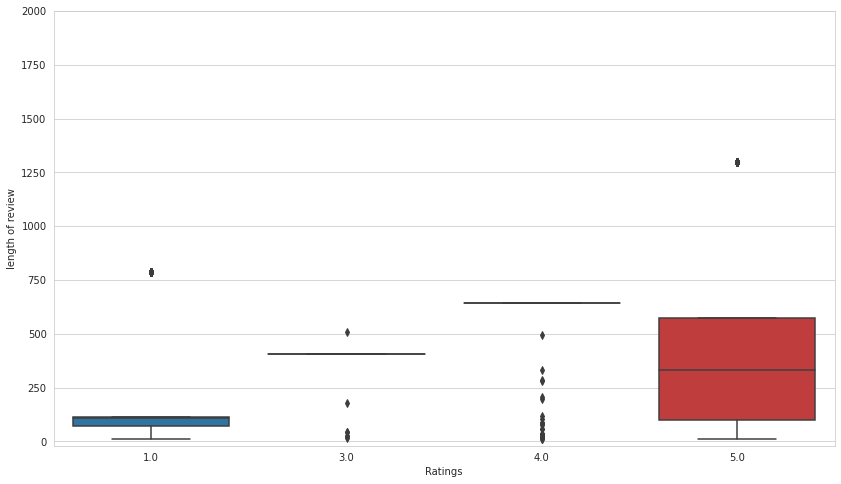

In [ ]:
#Plot length of review vs rating graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='whitegrid')

fig, ax = plt.subplots(figsize = (14,8))
sns.boxplot(result['Ratings'], result['length of review'])
plt.ylim(-20, 2000)

Text(0.5, 1.0, 'Combined Reviews')

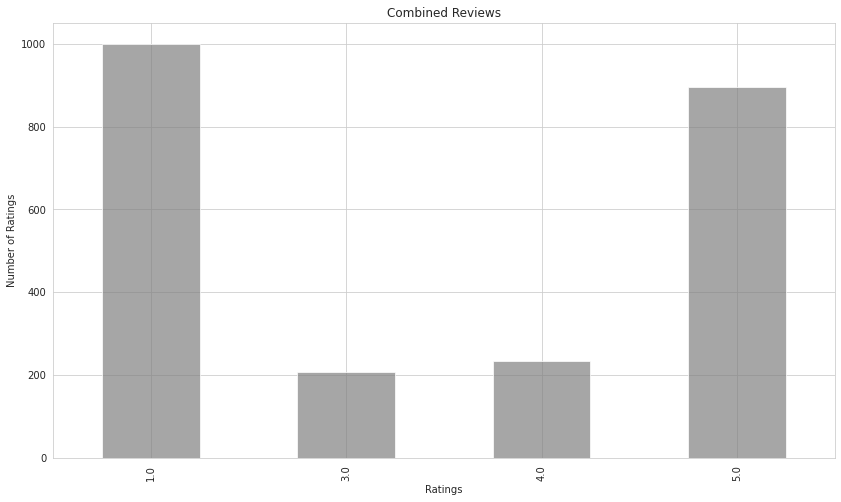

In [ ]:
#Plot number of Ratings for each Rating Score
fig, ax = plt.subplots(figsize = (14,8))
result.groupby('Ratings').size().plot(kind='bar', color="grey",alpha=0.7)
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')
plt.title('Combined Reviews')

In [ ]:
#import necessary libraries used in the preprocessing
import os
import pydrive
import re
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import nltk
#nltk library for preprocessing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
ps.stem("battery")

'batteri'

In [ ]:
#Create an Empty dictionary with features like battery, ram, display, heat, price, processor, 
#camera etc to store the number of reviews containing these features
term_count_dictionary={ps.stem("battery"):0, ps.stem("ram"):0, ps.stem("display"):0,ps.stem("heat"):0, ps.stem("design"):0, ps.stem("quality"):0, ps.stem("price"):0, ps.stem("processor"):0, ps.stem("memory"):0, ps.stem("camera"):0, ps.stem("performance"):0, ps.stem("touch"):0}

In [ ]:
term_count_dictionary

{'batteri': 0,
 'camera': 0,
 'design': 0,
 'display': 0,
 'heat': 0,
 'memori': 0,
 'perform': 0,
 'price': 0,
 'processor': 0,
 'qualiti': 0,
 'ram': 0,
 'touch': 0}

In [ ]:
for i in range(len(result)):
    temp_review=result['Reviews'][i]
    #coverting review to lowercase
    temp_review = temp_review.lower()
    #remving any digit present in the review
    temp_review = re.sub(r'\d+','',temp_review)
    #remove extra whitespaces present 
    temp_review = re.sub(r'[^\w\s]','', temp_review)
    #removing speacial characters
    temp_review= re.sub('[@_!#$%^&*()<>?/\|}{~:]','',temp_review)
    #stripping extra spaces on left and right
    temp_review = temp_review.strip()
    #removing all the stopwords present in the review
    temp_review = remove_stopwords(temp_review)
    words = word_tokenize(temp_review)

    #If the word exists in the review, increment the count in the dictionary by 1
    for word in words:
      if ps.stem(word) in term_count_dictionary:
        term_count_dictionary[ps.stem(word)]=term_count_dictionary[ps.stem(word)]+1


In [ ]:
#Print the populated dictionary which has count of the reviews which contain the mentioned features
term_count_dictionary

{'batteri': 637,
 'camera': 2656,
 'design': 1,
 'display': 21,
 'heat': 208,
 'memori': 0,
 'perform': 824,
 'price': 605,
 'processor': 2,
 'qualiti': 824,
 'ram': 1,
 'touch': 1}

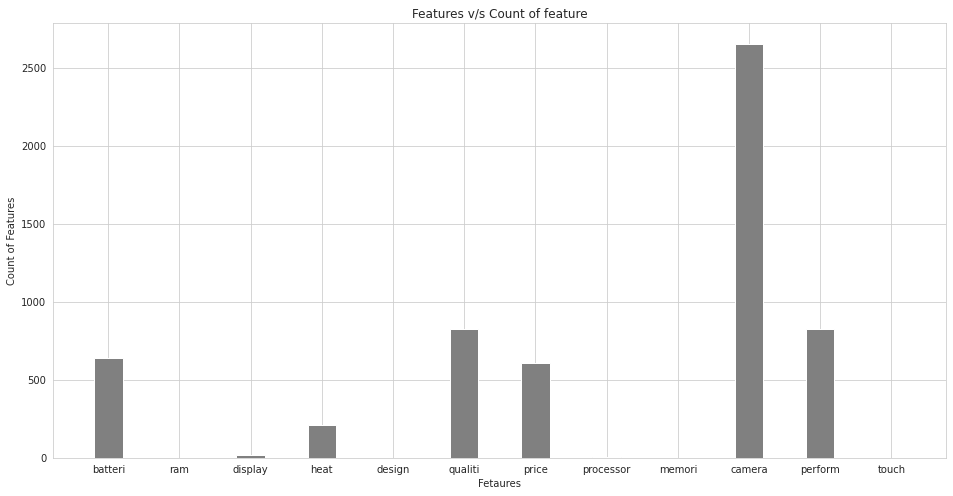

In [ ]:
#Plot the features vs the number of reviews which contain those features
features = list(term_count_dictionary.keys())
feature_count = list(term_count_dictionary.values())
fig = plt.figure(figsize = (16, 8))
plt.bar(features, feature_count, color ='grey',width = 0.4)
plt.xlabel("Fetaures")
plt.ylabel("Count of Features")
plt.title("Features v/s Count of feature")
plt.show()